# Übungsblatt 8 #

### Alice Ziegler, Daniel Schneider ###

## Aufgabe 8.1: Kernel ##

### a) Polynomial-Kernel ### 

$$
\begin{align}
k(x,z,) &= (x^Tz)^3 \\
&= (x_1z_1+x_2z_2+1)^3 \\
&= (x_1^3z_1^3+x_2^3z_2^3+3x_1^2x_2z_1^2z_2+3x_1x_2^2z_1z_2^2+3x_1^2z_1^2+3x_2^2z_2^2+6x_1x_2z_1z_2+3x_1z_1+3x_2z_2+1)\\
&= (x_1^3, x_2^3, \sqrt{3}x_1^2x_2, \sqrt{3}x_1x_2^2, \sqrt{3}x_1^2, \sqrt{3}x_2^2, \sqrt{6}x_1x_2, \sqrt{3}x_1, \sqrt{3}x_2, 1)^T\\
&= \Phi(x)^T \Phi(z)\\
\end{align}
$$

### b) Gaussian-Kernel ###

Gaussian Kernel: 

$$
\begin{align}
k(x, z) = exp \biggl(\frac{-||x-z||^2}{2 \sigma ^2}\biggr)
\end{align}
$$

Taylor Reihe: 

$$
\begin{align}
T_nf(x, x_0) = \sum_{k=0}^n{\frac{f^k(x_0)}{k!}(x-x_0)^k}
\end{align}
$$

Die Taylorreihe für die Exponentialfunktion ist: 
$$
\begin{align}
exp(x) = \sum_{n= 0}^\infty{\frac{x^n}{n!}}
\end{align}
$$

Die Exponentialfunktion kann also als unendliches Polynom geschrieben werden. 

Da allgemein formuliert ein Polynom mit d Dimensionen und k Graden einen Dimensionsvektor mit $d^k$ Dimensionen hat, 
$$
\begin{align}
\sum_{i=1}^k{\frac{(i+d-1)!}{i!(d-1)!}} = O(d^k)
\end{align}
$$
kann gefolgert werden, dass wenn $k\ \rightarrow \infty$ geht, auch $\infty$ Dimensionen vom Gauß Kernel erzeugt werden. 

## Aufgabe 8.2: Lineare Diskriminanz und Regression ##

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Laden der Datensätze ####

In [2]:
data1 = pd.read_csv("data/data1.csv")

In [3]:
data2 = pd.read_csv("data/data2.csv")

In [4]:
data3 = pd.read_csv("data/data3.csv")

In [5]:
def groupByClasses(data,classAttribute):
    cats = data[classAttribute].unique()
    
    dataClass = [None]*len(cats)
    
    for i in range(0,len(cats)):
        dataClass[i] = data.loc[data[classAttribute] == cats[i]]
    
    return(dataClass)

In [6]:
data1Classes = groupByClasses(data1,"label")

In [7]:
data2Classes = groupByClasses(data2,"label")

In [8]:
data3Classes = groupByClasses(data3,"label")

### a) Separierbarkeit der Daten ###

In [9]:
markers = ["+","o","_"]
colors = ["red","yellow","blue"]

#### Datensatz `data1` ####

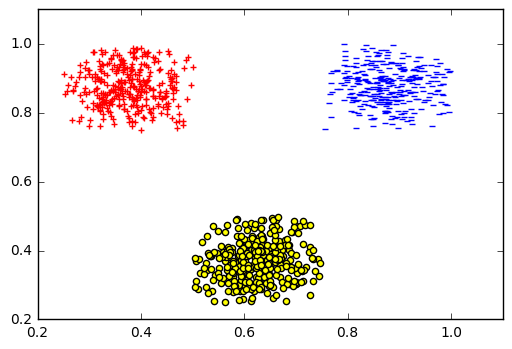

In [10]:
for i in range(len(data1Classes)):
    plt.scatter(data1Classes[i]["x"],data1Classes[i]["y"],marker=markers[i], c=colors[i])

plt.show()

Die Daten sind linear separierbar (und daher auch paarweise separierbar)

#### Datensatz `data2` ####

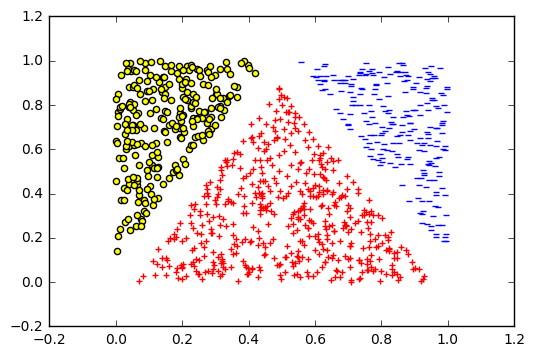

In [11]:
for i in range(len(data2Classes)):
    plt.scatter(data2Classes[i]["x"],data2Classes[i]["y"],marker=markers[i], c=colors[i])

plt.show()

Die Daten sind paarweise separierbar, aber nicht linear separierbar

#### Datensatz `data3` ####

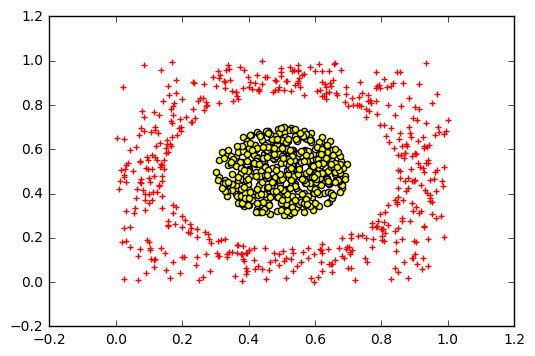

In [12]:
for i in range(len(data3Classes)):
    plt.scatter(data3Classes[i]["x"],data3Classes[i]["y"],marker=markers[i], c=colors[i])

plt.show()

Die Daten sind weder linear noch paarweise separierbar

### b) Paarweises Separieren der Daten durch lineare Diskriminanz ###

In [13]:
import random
import math

#### Funktionen für die Diskriminanzberechnung ####

In [14]:
def absListDist(list1, list2):
    return [abs(i-j) for (i,j) in zip(list1, list2)]

In [15]:
def convergence(wNew, wOld):
    if (type(wNew[0]) == type(wOld[0])):
        return (max(absListDist(wNew, wOld)) < 1e-3)
    else:
        return False

In [16]:
def sigmoid(x):
    if x < -100:
        return 0
    else:
        return (1/(1+math.exp(-x)))

In [17]:
def regressionDiscrimination(data, classAttribute):
    
    data2 = data.copy()
    
    data2['ones'] = 1
    
    cols = list(data2.columns.values)
    cols = [cols[len(cols)-1]] + cols[0:(len(cols)-1)]
    
    data2 = data2.reindex_axis(cols,axis=1)
    
    #print(data2)
    
    t = data2[classAttribute]
    dataW = data2.drop(classAttribute, axis=1)
    
    N, d = dataW.shape
    
    wCurr = [None]*d
    wPrev = [None]*d
    deltaW = [None]*d
    
    eta = 1e-1
    
    for j in range(d):
        wCurr[j] = random.uniform(-0.1,0.1)
    
    while not convergence(wCurr,wPrev):
        
        for j in range(d):
            deltaW[j] = 0
            wPrev[j] = wCurr[j]
        
        for i in range(N):
            temp = 0
            
            for j in range(d):
                temp += wCurr[j] * dataW[cols[j]][i]
            
            y = sigmoid(temp)
            
            for j in range(d):
                deltaW[j] += (t[i] - y) * y * (1 - y) * dataW[cols[j]][i]
        
        for j in range(d):
            wCurr[j] += eta * deltaW[j]
        
        #print (wCurr)
        eta *= 0.98
    return wCurr

In [18]:
def evaluateFunction(xs,ws):
    ys = np.empty_like(xs)
    
    #Formula: 0 = ws[0] + ws[1]*xs[i] + ws[2]*ys[i]    
    for i in range(xs.shape[0]):
        ys[i] = - (ws[0] + ws[1]*xs[i])/ws[2]
    
    return ys

In [19]:
def classifiedData(dataClasses,classAttribute):
    
    dataClassified = []
    
    for i in range(0,len(dataClasses)):
        tmpI = dataClasses[i].copy()
        tmpI[classAttribute] = 1
        
        for j in range(i+1,len(dataClasses)):
            tmpJ = dataClasses[j].copy()
            tmpJ[classAttribute] = 0
            
            dataClassified.append(pd.concat([tmpI,tmpJ]).reset_index(drop=True))
        
    return dataClassified

In [20]:
def classifiedDataDirections(dataClasses,classAttribute):
    
    dataDirections = []
    
    for i in range(0,len(dataClasses)):
        cI = dataClasses[i][classAttribute].unique()
                
        for j in range(i+1,len(dataClasses)):
            cJ = dataClasses[j][classAttribute].unique()
            
            dataDirections.append((cI[0],cJ[0]))
        
    return dataDirections

In [22]:
def discriminationPairwise(dataClasses, classAttribute):
    dataClassified = classifiedData(dataClasses, classAttribute)
    
    wsMultiple = [None]*len(dataClassified)

    for i in range(len(dataClassified)):
        wsMultiple[i] = regressionDiscrimination(dataClassified[i],classAttribute)
    
    return wsMultiple

#### Berechnung und Zeichnen der Regressionsgeraden ####

In [24]:
ws1 = discriminationPairwise(data1Classes,"label")

In [25]:
ws2 = discriminationPairwise(data2Classes,"label")

In [117]:
xVals = np.arange(0,1.01, 0.01)
ablineColors = ["orange","purple","green"]

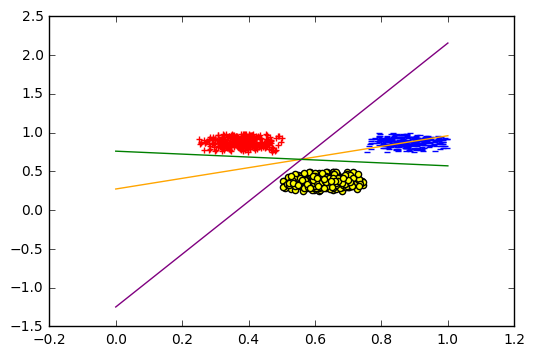

In [118]:
ablines1 = [None]*len(data1Classes)

for i in range(len(data1Classes)):
    plt.scatter(data1Classes[i]["x"],data1Classes[i]["y"],marker=markers[i], c=colors[i])

    ablines1[i] = evaluateFunction(xVals,ws1[i])
    plt.plot(xVals,ablines1[i], c=ablineColors[i])

plt.show()

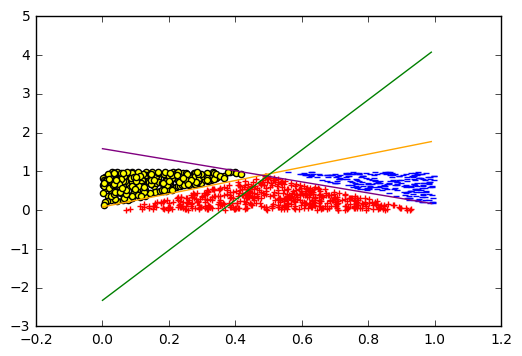

In [28]:
ablines2 = [None]*len(data2Classes)

for i in range(len(data2Classes)):
    plt.scatter(data2Classes[i]["x"],data2Classes[i]["y"],marker=markers[i], c=colors[i])

    ablines2[i] = evaluateFunction(xVals,ws2[i])
    plt.plot(xVals,ablines2[i], c=ablineColors[i])

plt.show()

## Aufgabe 8.3: Support Vector Machine ##

#### SVM-Klassifizierer mit Kernel ####

In [29]:
import scipy.optimize as sco

In [167]:
def polykernel(x,y):
    q = 2
    return((np.dot(np.transpose(y),x) + 1) ** q)

In [216]:
def precalculateKernel(data,classAttribute):
    N = data.shape[0]
    
    ts = data[classAttribute]
    dataNoClass = data.drop(classAttribute,axis=1)
    xs = np.c_[np.ones(N), dataNoClass]
        
    N,d = xs.shape
    
    kernel = np.empty([N,N])
    
    for i in range(N):
        for j in range(N):
            kernel[i,j] = polykernel(xs[i],xs[j])
            
    return kernel

In [269]:
def minimize(data,classAttribute,dataKernel, C=1):
    N = data.shape[0]
    
    ts = data[classAttribute]
    dataNoClass = data.drop(classAttribute,axis=1)
    xs = np.c_[np.ones(N), dataNoClass]
        
    N,d = xs.shape
    
    alphaInit = np.empty([N,1])
    for i in range(N):
        alphaInit[i] = random.uniform(-1e-10,1e-10)
    
    
    def mainFun(alphas):
        summe = 0
        for i in range(N):
            for j in range(N):
                summe += alphas[i] * alphas[j] * ts[i] * ts[j] * dataKernel[i,j]
        
        summe = -0.5 * summe + np.sum(alphas)
        print (summe)
        return -summe
    
    def nbFun(alphas):
        summe = 0
        for i in range(N):
            summe += alphas[i] * ts[i]
        
        return summe
    
    return sco.minimize(
        fun = mainFun,
        x0 = alphaInit,
        options = {'maxiter': 50, 'disp': True},
        constraints = [
            { 'type': 'eq', 'fun': nbFun },
            { 'type': 'ineq', 'fun': (lambda alpha: (alpha)) },
            { 'type': 'ineq', 'fun': (lambda alpha: (C - alpha)) }
        ]
    )

In [277]:
data3Test = data3.sample(300).reset_index(drop=True)

In [278]:
data3kernel = precalculateKernel(data3Test,"label")

In [279]:
result = minimize(data3Test,"label",data3kernel)
alphas = result.x

1.17903003918e-09
1.17903003918e-09
1.60801901808e-08
1.60801906593e-08
1.60801901822e-08
1.60801906744e-08
1.60801906101e-08
1.60801900906e-08
1.60801905429e-08
1.60801905484e-08
1.6080190666e-08
1.60801907251e-08
1.608019075e-08
1.60801904395e-08
1.60801900658e-08
1.60801903717e-08
1.60801901366e-08
1.60801906093e-08
1.60801900755e-08
1.60801907148e-08
1.60801902823e-08
1.60801905857e-08
1.6080190504e-08
1.60801905674e-08
1.60801903202e-08
1.60801904295e-08
1.60801905332e-08
1.60801906296e-08
1.60801900272e-08
1.60801904955e-08
1.60801905148e-08
1.60801904135e-08
1.60801904768e-08
1.60801907137e-08
1.60801900876e-08
1.60801904374e-08
1.60801906044e-08
1.60801907576e-08
1.60801907447e-08
1.60801904623e-08
1.60801906584e-08
1.608019005e-08
1.60801905771e-08
1.60801906152e-08
1.60801905852e-08
1.60801906401e-08
1.60801901034e-08
1.60801905435e-08
1.60801905257e-08
1.60801905823e-08
1.6080189876e-08
1.60801901004e-08
1.60801906129e-08
1.60801902745e-08
1.60801906488e-08
1.60801898816e-08

In [280]:
alphas

array([  1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   2.38708873e-11,   1.99026044e-11,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.53312936e-11,   1.46207486e-11,   1.00000000e+00,
         7.64896839e-11,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   9.33383450e-12,   1.00000000e+00,
         2.95186446e-01,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.19175087e-11,   8.37306250e-01,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00783848e-11,
         1.77024785e-11,

#### Plotten der Punkte und Trennlinien ####

In [254]:
def evaluateFunction2(xInput,data,classAttribute,alphas):
    def calculateW0(alphas,ts):
        N = alphas.shape[0]

        xs = np.ones(N)
        
        summe = 0
        for i in range(N):
            summe += alphas[i] * ts[i] * xs[i]

        return summe
    
    M = xInput.shape[0]
        
    ts = data[classAttribute]
    xs = data.drop(classAttribute, axis=1).as_matrix()
    
    N,d = xs.shape
    
    w0 = calculateW0(alphas,ts)
    
    #print(w0)
    
    zs = np.empty([M,1])
    
    #Formula: 0 = ws[0] + ws[1]*xs[i] + ws[2]*ys[i]    
    for j in range(M):
        
        summe = 0
        for i in range(N):
            #print(xs[i])
            #print(xInput[j])
            summe += alphas[i] * ts[i] * polykernel(xs[i],xInput[j]) + w0
    
        zs[j] = summe
    return zs

In [272]:
xx, yy = np.meshgrid(xVals,xVals)

In [288]:
Z = evaluateFunction2(np.c_[xx.ravel(), yy.ravel()],data3Test,"label", alphas)

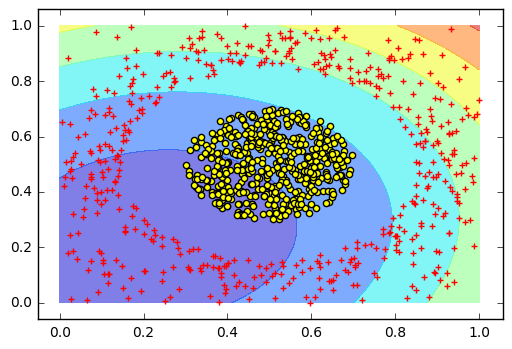

In [289]:
Z = Z.reshape(xx.shape)
#print(Z)
plt.contourf(xx, yy, Z, alpha=0.5)

for i in range(len(data3Classes)):
    plt.scatter(data3Classes[i]["x"],data3Classes[i]["y"],marker=markers[i], c=colors[i])
    
plt.show()